

# Project: Investigate a Dataset (tmdb Movies!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

## Introduction

In [18]:
!pip install matplotlib

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


### Loading data

In [20]:
df = pd.read_csv("tmdb-movies.csv")

<a id='wrangling'></a>
## Data Wrangling


### Exploring dimensions, head and data types

In [21]:
df.shape



(10866, 21)

In [22]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [23]:
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

### Data Cleaning

#### Check for missing values:

In [24]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

###### There are too many null values in homepage, tagline, keywords
###### these columns will be dropped

In [25]:
df.drop(["homepage","tagline","keywords"],axis=1,inplace=True)

In [26]:
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'director', 'overview', 'runtime', 'genres',
       'production_companies', 'release_date', 'vote_count', 'vote_average',
       'release_year', 'budget_adj', 'revenue_adj'],
      dtype='object')

In [27]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

#### there is still missing values, these rows will be dropped 

In [28]:
df.dropna(inplace=True)

In [29]:
df.isnull().sum()

id                      0
imdb_id                 0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
overview                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

#### Checking for duplicate rows 

In [30]:
df.duplicated().sum()

1

In [31]:
df.drop_duplicates(inplace =True)

#### Resetting indexes after all the changes done to rows. 

In [95]:
df.reset_index(drop=True,inplace=True)

### What was done in data cleaning? 
> some Columns with high number of null values were dropped.

> some other rows were dropped .

> duplicated value removed.

<a id='eda'></a>
## Exploratory Data Analysis

### What questions to ask:  
#### Which genres are most popular fromyear to year? 
#### What kinds of properties are associated withmovies that have high revenues?

#### Find most popular genres. 

In [109]:
genres = []

In [110]:
for i in range(len(df.genres)):
    curr_genres = df.genres[i].split("|")
    genres += curr_genres
genres = np.unique(genres)
print(genres)

['Action' 'Adventure' 'Animation' 'Comedy' 'Crime' 'Documentary' 'Drama'
 'Family' 'Fantasy' 'Foreign' 'History' 'Horror' 'Music' 'Mystery'
 'Romance' 'Science Fiction' 'TV Movie' 'Thriller' 'War' 'Western']


In [123]:
def genres_values(x, y, z): 
    for i in range(df.shape[0]):
        for j in range(len(x)): 
            if x[j] in df.genres[i]:
                y[j] += z[i]
    return y 

In [124]:
genres_counts = [0] * len(genres)
for i in range(len(df.genres)):
    for j in range(len(genres)): 
        if genres[j] in df.genres[i]:
            genres_counts[j] += 1
print(genres_counts)


[2233, 1384, 615, 3433, 1299, 317, 4364, 1095, 839, 120, 306, 1526, 339, 773, 1570, 1134, 132, 2746, 258, 160]


In [125]:
genres_counts = [0] * len(genres)
genres_counts = genres_values(genres, genres_counts, [1]*10000)
print(genres_counts)

[2233, 1384, 615, 3433, 1299, 317, 4364, 1095, 839, 120, 306, 1526, 339, 773, 1570, 1134, 132, 2746, 258, 160]


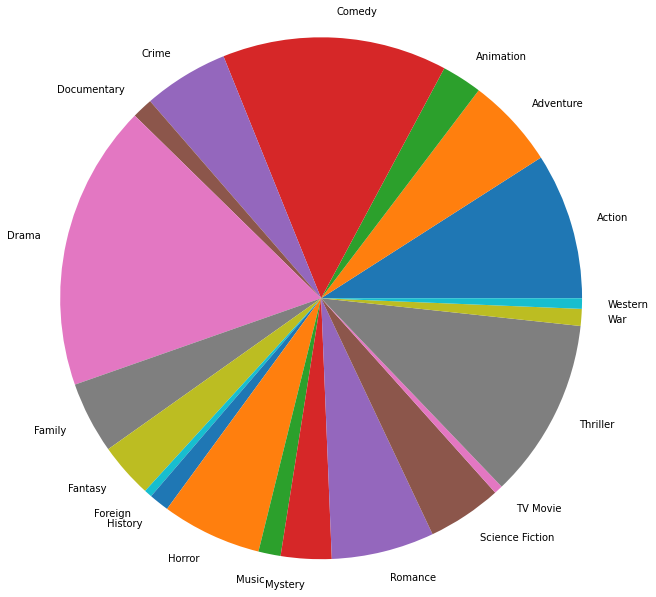

In [103]:
plt.pie(genres_counts, labels = genres, radius = 3)
plt.show()

### What can we conclude? 
>Most common genre is Drame

#### Find relation between genre and revenue 

In [126]:
genres_revenue = [0] * len(genres)
for i in range(df.shape[0]):
    for j in range(len(genres)): 
        if genres[j] in df.genres[i]:
            genres_revenue[j] += df.revenue[i]
print(genres_revenue)

[173417346979, 166317625752, 52555269088, 142141376544, 57358633586, 1002788382, 138895792087, 89019110787, 88202023988, 177908256, 10688792700, 27494096491, 11648638379, 32500228996, 61021572866, 86186102916, 42000000, 121188580779, 12853399491, 4713837032]


In [127]:
genres_revenue = [0] * len(genres)
genres_revenue = genres_values(genres, genres_revenue, df.revenue)
print(genres_revenue)

[173417346979, 166317625752, 52555269088, 142141376544, 57358633586, 1002788382, 138895792087, 89019110787, 88202023988, 177908256, 10688792700, 27494096491, 11648638379, 32500228996, 61021572866, 86186102916, 42000000, 121188580779, 12853399491, 4713837032]


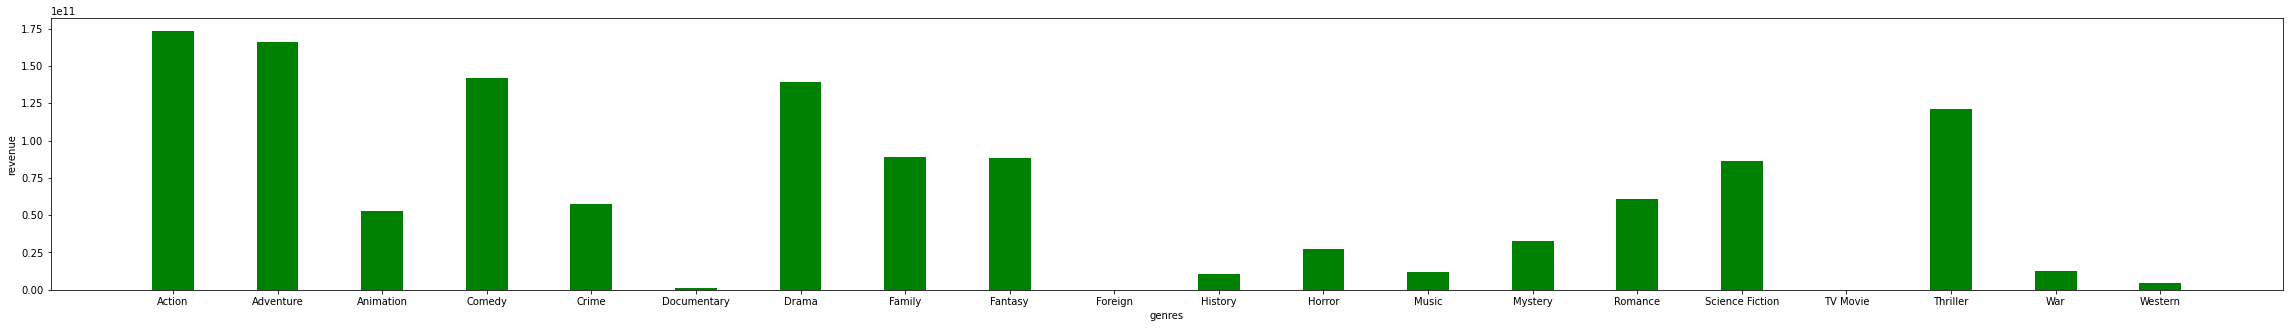

In [56]:
fig = plt.figure(figsize = (40, 5))
plt.bar(genres, genres_revenue, color ='green',
        width = 0.4)
 
plt.xlabel("genres")
plt.ylabel("revenue")
plt.show()

### What can we conclude? 
>Highest revenue comes from action movies

### What kinds of properties are associated withmovies that have high revenues?

#### Are these movies also good from critics point of view? 


In [59]:
df.revenue.describe()

count    9.770000e+03
mean     4.424026e+07
std      1.225998e+08
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      3.105779e+07
max      2.781506e+09
Name: revenue, dtype: float64

#### an assumption will be made here is: If a movie has 0 revenue it will be dropped, 0 is treated as NaN 

In [65]:
revenue_cleaned_df = df[df['revenue'] != 0]
revenue_cleaned_df.shape

(4750, 18)

In [75]:
revenue_cleaned_df.revenue.describe()

count    4.750000e+03
mean     9.099524e+07
std      1.632905e+08
min      2.000000e+00
25%      8.501551e+06
50%      3.331677e+07
75%      1.015876e+08
max      2.781506e+09
Name: revenue, dtype: float64

In [76]:
high_revenue_movies = revenue_cleaned_df[revenue_cleaned_df['revenue'] > revenue_cleaned_df.revenue.describe()[6]]

In [81]:
high_revenue_movies_average = high_revenue_movies[high_revenue_movies['revenue'] > high_revenue_movies.revenue.describe()[4]]

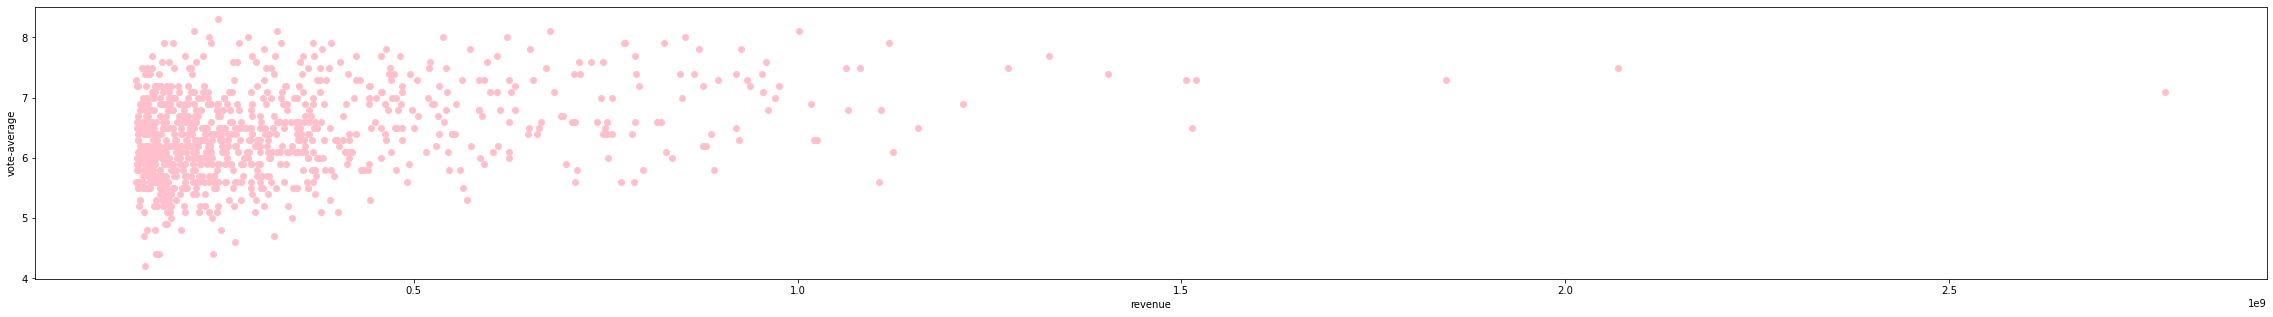

In [90]:
fig = plt.figure(figsize = (40, 5))
plt.scatter(high_revenue_movies_average.revenue, high_revenue_movies_average.vote_average, c = "pink")
plt.xlabel("revenue")
plt.ylabel("vote-average")
plt.show()

####  Is there a relation between revenue and budget? 

<AxesSubplot:xlabel='budget', ylabel='revenue'>

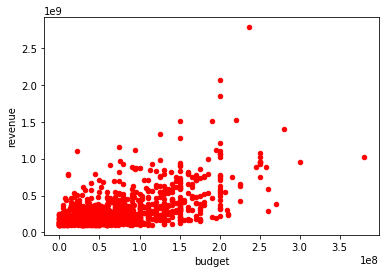

In [94]:
high_revenue_movies.plot.scatter(x = 'budget', y= 'revenue', c = 'r')

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'popularity'}>,
        <AxesSubplot:title={'center':'budget'}>],
       [<AxesSubplot:title={'center':'revenue'}>,
        <AxesSubplot:title={'center':'runtime'}>,
        <AxesSubplot:title={'center':'vote_count'}>],
       [<AxesSubplot:title={'center':'vote_average'}>,
        <AxesSubplot:title={'center':'release_year'}>,
        <AxesSubplot:title={'center':'budget_adj'}>],
       [<AxesSubplot:title={'center':'revenue_adj'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

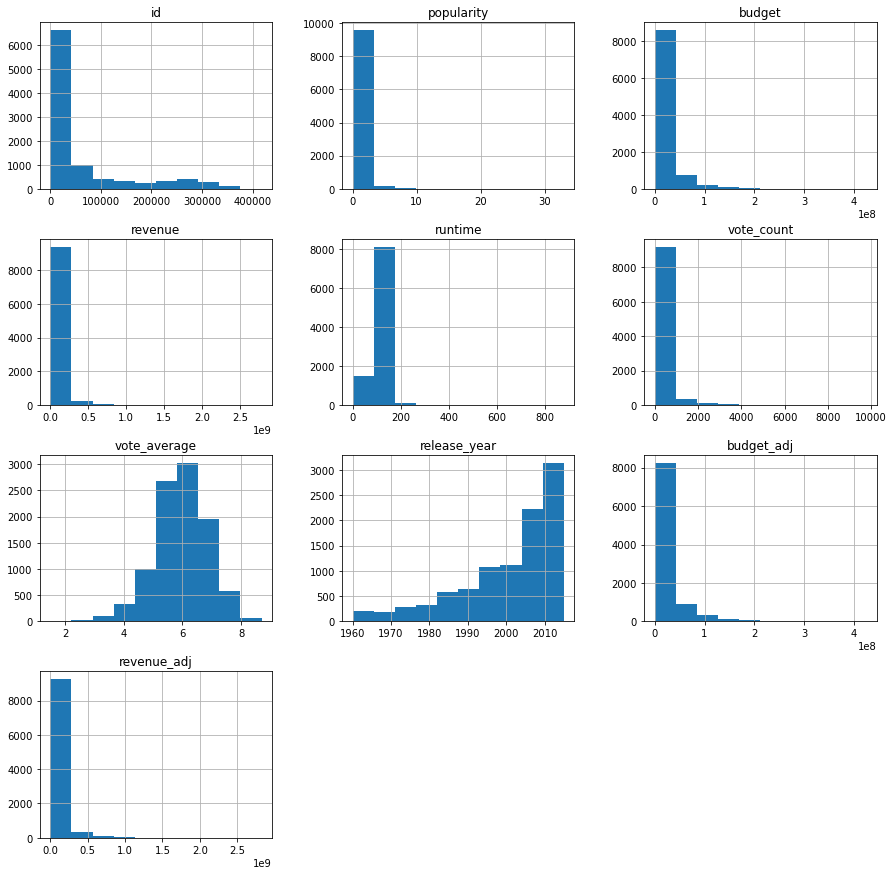

In [86]:
df.hist(figsize = (15,15))

<a id='conclusions'></a>
## Conclusions

> Conclusion1: The most popular genres of movies are: 
                   1- Drama
                   2- Comedy
                   3- Thriller

> Conclusion2: The highest profit movies are: 
                   1- Action
                   2- Adventure 

>Conclusion3: there is no clear relation between revenue and average_vote 
>Conclusion4: There is relatively positive correlation between budget and revenue

## Limitations
> I didn't find a relation between Revenue and average_score

> I didn't consider the value of the money which changes over the years.